In [1]:
# importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import sklearn
import keras
import os

In [2]:
# get the csv file path
csv = os.path.join(os.getcwd(),'datasets','cases_malaysia_train.csv')
# load csv onto a dataframe
df = pd.read_csv(csv)
# separate the date time with the other data
date_time = pd.to_datetime(df.pop('date'), format='%d/%m/%Y')
df

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4,4,0,4,0,4,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,3,0,7,0,3,0,0,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,4879,24,5168,64978,97,1125,55,3595,104,787,...,358,165,60,0.0,25.0,0.0,28.0,33.0,0.0,31.0
676,5439,21,6803,63583,110,1363,54,3900,122,891,...,387,197,61,0.0,25.0,0.0,8.0,33.0,0.0,31.0
677,5806,11,7246,62099,339,1325,40,4271,170,950,...,410,174,59,0.0,14.0,2.0,13.0,148.0,52.0,110.0
678,5551,23,5301,62303,179,1312,46,4046,147,916,...,411,167,48,0.0,6.0,0.0,3.0,104.0,0.0,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    object 
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11               6

In [4]:
# check na value
df.isna().sum()

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

there are null value in column
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342

In [5]:
# in columns cases_new there are weird object such as ? and space we have to convert them to 0 and convert them to int 64
df_cases_new = df['cases_new'].copy()
df_cases_new = df_cases_new.replace(to_replace=' ', value='').fillna(0)
df_cases_new = df_cases_new.replace(to_replace='?', value='').fillna(0)
df_cases_new = df_cases_new.apply(pd.to_numeric)
df_cases_new = pd.DataFrame(df_cases_new, columns=['cases_new'])
df_cases_new = df_cases_new.fillna(0)
df_cases_new.isna().sum()

cases_new    0
dtype: int64

In [6]:
# putting in the adjusted column onto the original column
df['cases_new'] = df_cases_new['cases_new'].values
# putting in the imputed value onto a new df called df2
df2 = df.copy()

# impute missing value
imputer = sklearn.impute.SimpleImputer()

df2 = imputer.fit_transform(df2)
df2 = pd.DataFrame(df2, columns=df.columns)
df2

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
4,3.0,3.0,0.0,7.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,4879.0,24.0,5168.0,64978.0,97.0,1125.0,55.0,3595.0,104.0,787.0,...,358.0,165.0,60.0,0.000000,25.000000,0.000000,28.000000,33.000000,0.000000,31.000000
676,5439.0,21.0,6803.0,63583.0,110.0,1363.0,54.0,3900.0,122.0,891.0,...,387.0,197.0,61.0,0.000000,25.000000,0.000000,8.000000,33.000000,0.000000,31.000000
677,5806.0,11.0,7246.0,62099.0,339.0,1325.0,40.0,4271.0,170.0,950.0,...,410.0,174.0,59.0,0.000000,14.000000,2.000000,13.000000,148.000000,52.000000,110.000000
678,5551.0,23.0,5301.0,62303.0,179.0,1312.0,46.0,4046.0,147.0,916.0,...,411.0,167.0,48.0,0.000000,6.000000,0.000000,3.000000,104.000000,0.000000,66.000000


In [7]:
df2.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

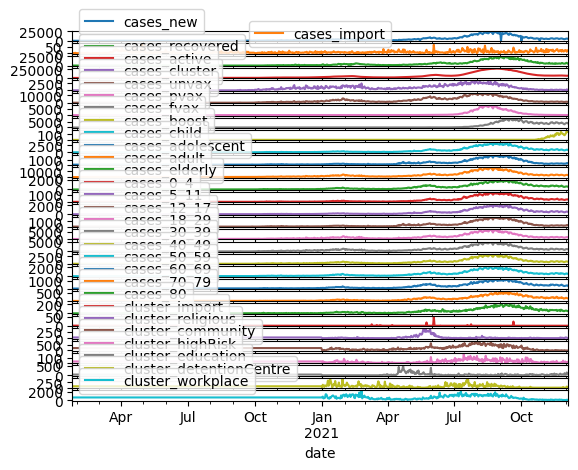

In [8]:
# data inspection
plot_cols = df2.columns
plot_features = df2[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)


In [9]:
import time_series_helper

In [10]:
testcsv = os.path.join(os.getcwd(), 'datasets', 'cases_malaysia_test.csv')
test_df = pd.read_csv(testcsv)
date_time2 = pd.to_datetime(test_df.pop('date'), format='%d/%m/%Y')
test_df

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4298.0,23,4928,61813,136,1017,38,3093,150,734,...,330,130,49,0,13,3,12,69,0,39
1,4262.0,15,5894,60139,97,1036,39,3056,131,707,...,352,141,49,0,10,0,2,30,0,55
2,4965.0,29,4817,60251,138,1130,46,3642,147,763,...,395,169,81,0,3,13,39,36,0,47
3,5020.0,17,4525,60709,154,1162,41,3674,143,768,...,378,154,43,0,2,3,0,32,1,116
4,5446.0,20,5427,60700,367,1207,53,4034,152,840,...,367,161,46,0,0,1,8,153,0,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30787.0,608,26457,314211,282,4454,663,9118,16552,3715,...,1851,905,336,0,0,1,14,153,18,96
96,32800.0,541,24444,322507,309,4782,773,9122,18123,4045,...,2060,927,361,0,0,3,42,97,58,109
97,26250.0,545,25089,323618,269,3569,707,7151,14823,3078,...,1724,788,302,0,0,3,42,97,58,109
98,22535.0,361,25356,320785,163,3222,505,6057,12751,2735,...,1448,700,288,0,0,7,40,8,61,153


In [11]:
test_df.isna().sum()

cases_new                  1
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [12]:
# impute the missing data in test_df
imputer = sklearn.impute.SimpleImputer()

test_df = imputer.fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=df.columns)
test_df

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4298.0,23.0,4928.0,61813.0,136.0,1017.0,38.0,3093.0,150.0,734.0,...,330.0,130.0,49.0,0.0,13.0,3.0,12.0,69.0,0.0,39.0
1,4262.0,15.0,5894.0,60139.0,97.0,1036.0,39.0,3056.0,131.0,707.0,...,352.0,141.0,49.0,0.0,10.0,0.0,2.0,30.0,0.0,55.0
2,4965.0,29.0,4817.0,60251.0,138.0,1130.0,46.0,3642.0,147.0,763.0,...,395.0,169.0,81.0,0.0,3.0,13.0,39.0,36.0,0.0,47.0
3,5020.0,17.0,4525.0,60709.0,154.0,1162.0,41.0,3674.0,143.0,768.0,...,378.0,154.0,43.0,0.0,2.0,3.0,0.0,32.0,1.0,116.0
4,5446.0,20.0,5427.0,60700.0,367.0,1207.0,53.0,4034.0,152.0,840.0,...,367.0,161.0,46.0,0.0,0.0,1.0,8.0,153.0,0.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30787.0,608.0,26457.0,314211.0,282.0,4454.0,663.0,9118.0,16552.0,3715.0,...,1851.0,905.0,336.0,0.0,0.0,1.0,14.0,153.0,18.0,96.0
96,32800.0,541.0,24444.0,322507.0,309.0,4782.0,773.0,9122.0,18123.0,4045.0,...,2060.0,927.0,361.0,0.0,0.0,3.0,42.0,97.0,58.0,109.0
97,26250.0,545.0,25089.0,323618.0,269.0,3569.0,707.0,7151.0,14823.0,3078.0,...,1724.0,788.0,302.0,0.0,0.0,3.0,42.0,97.0,58.0,109.0
98,22535.0,361.0,25356.0,320785.0,163.0,3222.0,505.0,6057.0,12751.0,2735.0,...,1448.0,700.0,288.0,0.0,0.0,7.0,40.0,8.0,61.0,153.0


3) This is a single-step single-output problem. With an input window width of 30,
output window width of 30 and an offset of 1.


In [13]:
# split data

n = len(df2)

train_df = df2[:int(n*0.8)] # 80% goes to training
val_df = df2[int(n*0.2):] # rest goes to validation

num_features = df2.shape[1]

In [14]:
# identify columns to normalize (exclude 'cases_boost')
columns_to_normalize = [col for col in train_df.columns if col != 'cases_boost']

# normalize data
train_mean = train_df[columns_to_normalize].mean()
train_std = train_df[columns_to_normalize].std()

train_df[columns_to_normalize] = (train_df[columns_to_normalize] - train_mean) / train_std
val_df[columns_to_normalize] = (val_df[columns_to_normalize] - train_mean) / train_std
test_df[columns_to_normalize] = (test_df[columns_to_normalize] - train_mean) / train_std

C:\Users\suhaimi\AppData\Local\Temp\ipykernel_20132\671537642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[columns_to_normalize] = (train_df[columns_to_normalize] - train_mean) / train_std
C:\Users\suhaimi\AppData\Local\Temp\ipykernel_20132\671537642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[columns_to_normalize] = (val_df[columns_to_normalize] - train_mean) / train_std


In [155]:
OUT_STEPS = 1
window = time_series_helper.WindowGenerator(input_width=30, 
                                            label_width=OUT_STEPS, 
                                            shift=OUT_STEPS,
                                            train_df=train_df,
                                            val_df=val_df,
                                            test_df=test_df)
window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): None

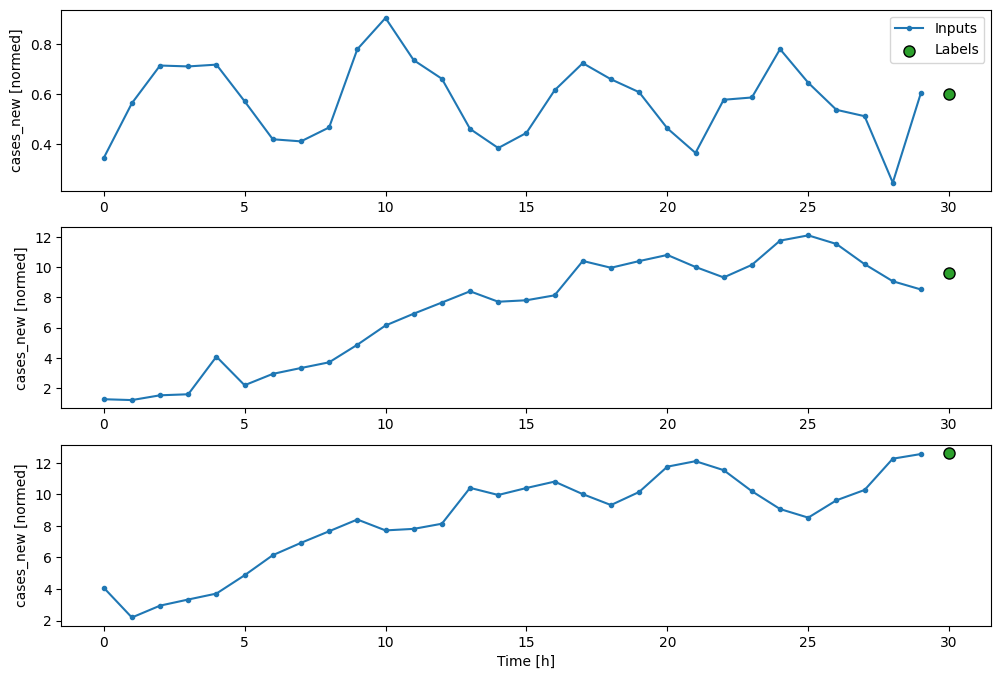

In [156]:
window.plot(plot_col='cases_new')

In [165]:
# instantiate the model
model_single_step = keras.Sequential()

# LSTM Layers
model_single_step.add(keras.layers.LSTM(units=32, return_sequences=True,
                                        kernel_initializer=keras.initializers.HeUniform(),
                                        kernel_regularizer=keras.regularizers.L2(0.01),
                                        dropout=0.2))  
model_single_step.add(keras.layers.LSTM(units=64, return_sequences=True,
                                        kernel_initializer=keras.initializers.HeUniform(),
                                        kernel_regularizer=keras.regularizers.L2(0.01),
                                        dropout=0.2))
model_single_step.add(keras.layers.Bidirectional(keras.layers.LSTM(units=64, return_sequences=False,
                                        kernel_initializer=keras.initializers.HeUniform(),
                                        kernel_regularizer=keras.regularizers.L2(0.05),
                                        dropout=0.1)))

# Dense Layer
model_single_step.add(keras.layers.Dense(OUT_STEPS * num_features, activation='linear'))

# Reshape output to match target shape
model_single_step.add(keras.layers.Reshape([OUT_STEPS, num_features]))

In [166]:
import mlflow

mlflow.set_experiment('Covid-19')

<Experiment: artifact_location='file:///c:/Users/suhaimi/Desktop/Nidzam/capstone_project/capstone%201/mlruns/182306340468243361', creation_time=1741576169752, experiment_id='182306340468243361', last_update_time=1741576169752, lifecycle_stage='active', name='Covid-19', tags={}>

In [167]:
# compile and train
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_single_step.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
with mlflow.start_run() as run:
    mlflow_callback = mlflow.keras.MLflowCallback(run)
    run_id = run.info.run_id
    log_path = f'logs/{run_id}'
    # train the model with mlflow callbacks
    history_single = model_single_step.fit(window.train, validation_data=window.val, epochs=80, batch_size=48, callbacks=mlflow_callback)
    mlflow.keras.save.log_model(model_single_step, artifact_path='model')

Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 49.2220 - mae: 0.5014 - val_loss: 78.2887 - val_mae: 1.6440
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.6870 - mae: 0.3244 - val_loss: 62.0995 - val_mae: 1.5634
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.0779 - mae: 0.3086 - val_loss: 57.5916 - val_mae: 1.6349
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.6006 - mae: 0.3115 - val_loss: 55.1826 - val_mae: 1.5795
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.0618 - mae: 0.2677 - val_loss: 53.3560 - val_mae: 1.5037
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6962 - mae: 0.2780 - val_loss: 51.8934 - val_mae: 1.4679
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5351 - mae: 0.2975 - val_loss: 51.8582 - val_mae: 1.4932
Epoch 8/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.4999 - mae: 0.3056 - val_loss: 54.8329 - val_mae: 1.5894
Epoch 9/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - l

2025/03/10 14:18:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/10 14:18:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


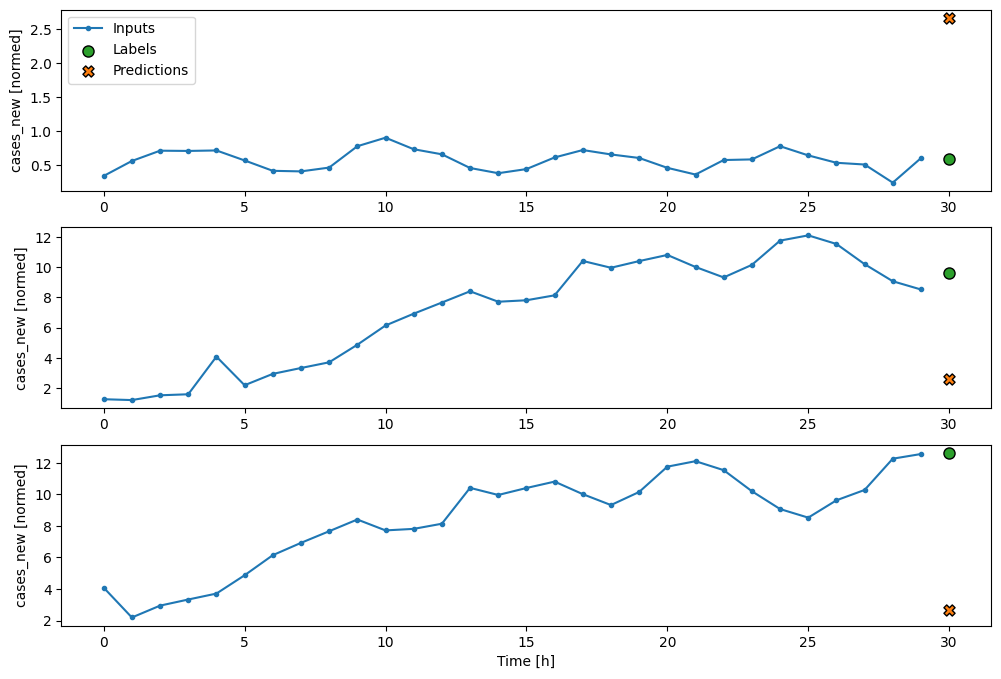

In [168]:
window.plot(model = model_single_step, plot_col='cases_new')